In [1]:
import sys
import os
sys.path.append(os.path.abspath('/Users/ericxia/school/Math-148-Project/food-classification'))

import pandas as pd
from data_utils.utils import keep_existing_photos, visualize_images

### Load and preprocess data

In [2]:
base_dir = "../../"

business_df = pd.read_json(f'{base_dir}data/yelp_dataset/yelp_academic_dataset_business.json', lines=True)
photos_df = pd.read_json(f'{base_dir}data/yelp_photos/photos.json', lines=True)

photo_dir = f"{base_dir}data/yelp_photos/resized_photos"
photos_df = keep_existing_photos(photos_df, photo_dir)
original_df = photos_df.copy()

Checking images: 100%|██████████| 200100/200100 [00:05<00:00, 38264.93it/s]


In [3]:
photos_df = photos_df[photos_df['label'] == 'food'].copy()

categories_df = business_df[['business_id', 'attributes']].copy()
photos_df = photos_df.merge(categories_df, on="business_id", how="left")

photos_df = photos_df[photos_df['attributes'].notna()]
photos_df['price_range'] = photos_df['attributes'].apply(lambda x: x.get('RestaurantsPriceRange2'))

photos_df['price_range'] = photos_df['price_range'].astype(int)

In [4]:
photos_df.price_range.value_counts()

price_range
2    63103
1    25719
3     7055
4     1052
Name: count, dtype: int64

### Visualize labels

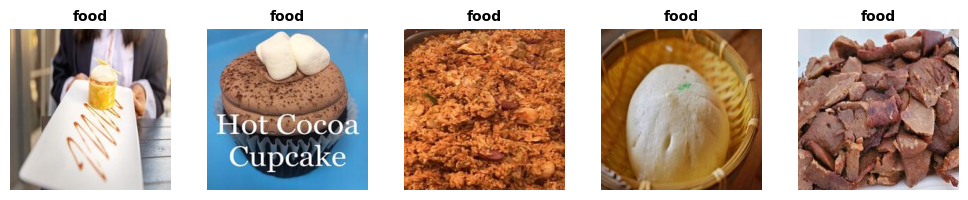

In [5]:
label = 'label' 
image_dir = f"{base_dir}data/yelp_photos/resized_photos"
visualize_images(original_df, image_dir, label, label_value="food", num_samples=5)

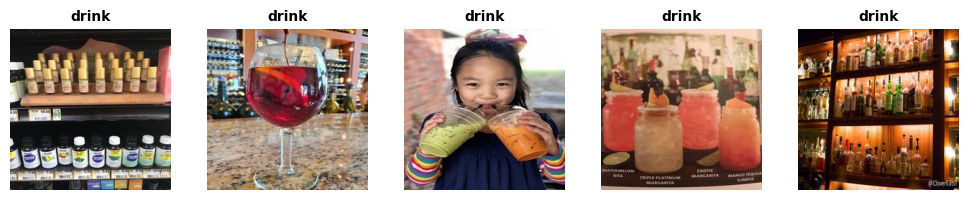

In [8]:
visualize_images(original_df, image_dir, label, label_value="drink", num_samples=5)

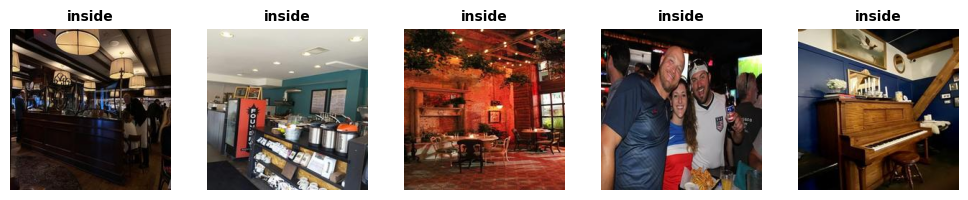

In [9]:
visualize_images(original_df, image_dir, label, label_value="inside", num_samples=5)

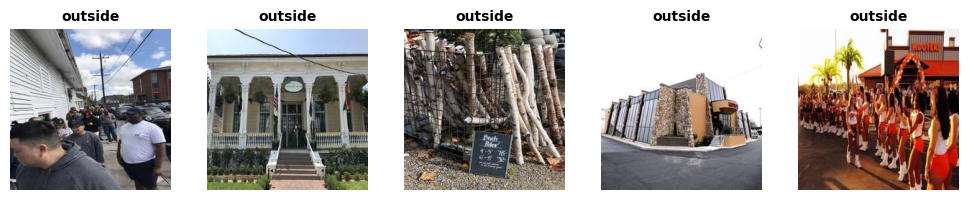

In [10]:
visualize_images(original_df, image_dir, label, label_value="outside", num_samples=5)

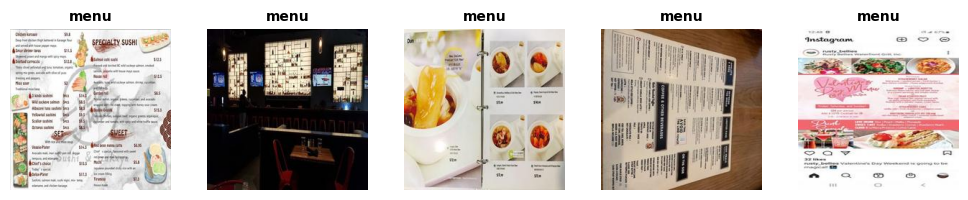

In [11]:
visualize_images(original_df, image_dir, label, label_value="menu", num_samples=5)

### Visualize price ranges

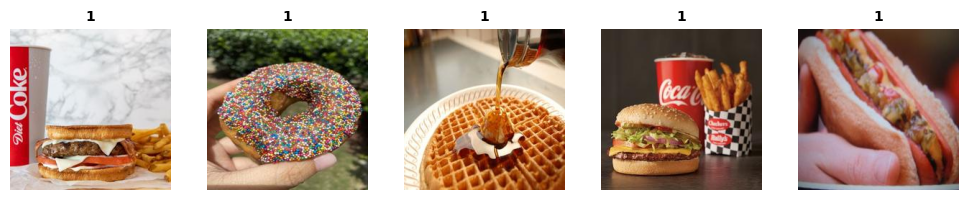

In [8]:
label = 'price_range' 
image_dir = f"{base_dir}data/yelp_photos/resized_photos"
visualize_images(photos_df, image_dir, label, label_value=1, num_samples=5)

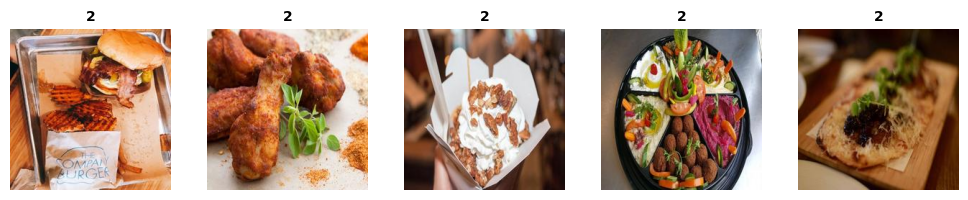

In [9]:
visualize_images(photos_df, image_dir, label, label_value=2, num_samples=5)

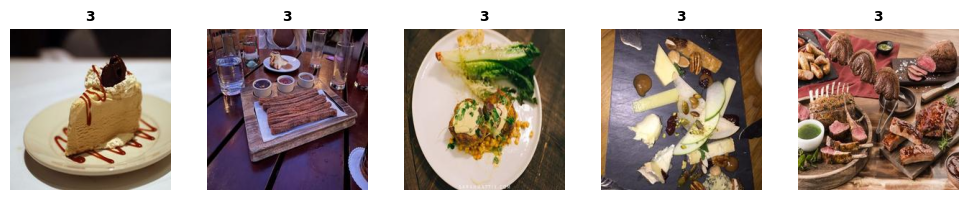

In [10]:
visualize_images(photos_df, image_dir, label, label_value=3, num_samples=5)

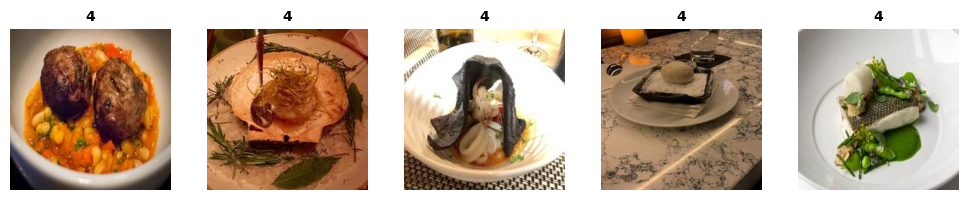

In [11]:
visualize_images(photos_df, image_dir, label, label_value=4, num_samples=5)